#Importar librerías necesarias

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

#1. Exploración y preprocesamiento de datos:

In [3]:
# Cargar el dataset “Heart Disease UCI”
df = pd.read_csv("/content/xAPI-Edu-Data.csv")

# Imprime las primeras filas del df
print("Primeras 5 filas del df:")
display(df.head())

# Imprime informacion sobre el df
print("Informacion sobre el df:")
display(df.info())

# Imprime caracteristicas descriptivas del df
print("Caracteristicas descriptivas del df:")
display(df.describe())

# Imprime si hay valores nulos
print("Cantidad de valores nulos por columna:")
display(df.isnull().sum())

Primeras 5 filas del df:


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Informacion sobre el df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  P

None

Caracteristicas descriptivas del df:


,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


Cantidad de valores nulos por columna:


,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


##Codificación de variables categóricas y normalización de datos numéricos.

In [6]:
# Identificar columnas categóricas (tipo 'object')
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas:", cat_cols)

# Codificar variables categóricas usando LabelEncoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos el encoder por si quieres decodificar luego

print("Codificación categórica completada.")

# Escalado de todas las variables usando MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Normalización Min-Max completada.")

Columnas categóricas: ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
Codificación categórica completada.
Normalización Min-Max completada.


#2. Análisis no supervisado:

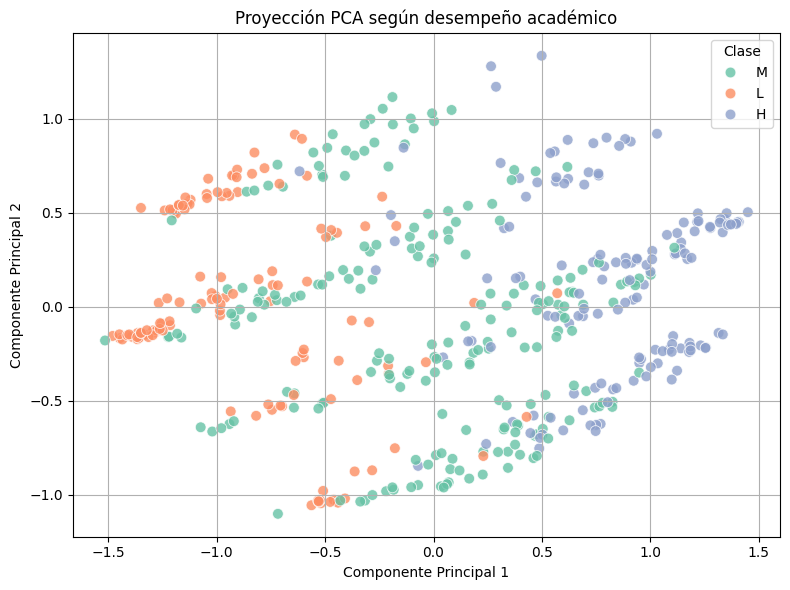

In [8]:
# PCA: Reducimos a 2 componentes principales para visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Proyectar en espacio reducido con la variable de desempeño académico (Class)
# Usamos el DataFrame original para recuperar las clases
class_labels = label_encoders['Class'].inverse_transform(df['Class'])  # vuelve a convertir etiquetas numéricas a H/M/L

# Visualización PCA coloreada por clase
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=class_labels, palette='Set2', s=60, alpha=0.8)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Proyección PCA según desempeño académico")
plt.legend(title='Clase')
plt.grid(True)
plt.tight_layout()
plt.show()

##Observaciones sobre la proyección PCA
- Se aprecia una distribución amplia de los puntos en el plano de los dos primeros componentes, lo que indica que hay variabilidad significativa capturada por estos ejes.

- Las clases H, M y L se entremezclan parcialmente, aunque hay algunos grupos con predominancia de una clase, lo cual sugiere que ciertas combinaciones de características sí permiten distinguir perfiles de rendimiento.

- La separación entre clases no es completamente definida, lo cual es esperable en fenómenos educativos complejos donde múltiples factores interactúan.

#3. Modelado con MLP:

In [10]:
# Definir variable objetivo y matriz de características
# Usamos la columna codificada 'Class' como target (rango H, M, L codificado numéricamente)
X = df_scaled.drop('Class', axis=1)  # Todas las variables menos la clase
y = df_scaled['Class']              # Clase objetivo (0 = H, 1 = M, 2 = L)

# Simplificar el problema a clasificación binaria: rendimiento alto (H) vs bajo (L)
# Convertimos las etiquetas a binario: 1 si rendimiento alto ('H'), 0 si bajo ('L'), descartamos 'M'
# Recuperar clase original antes de binarizar
y_original = label_encoders['Class'].inverse_transform(df['Class'])
mask = np.isin(y_original, ['H', 'L'])  # Filtrar solo H y L

X_bin = X[mask]                         # Filtrar características
y_bin = (y_original[mask] == 'H').astype(int)  # 1 si es H (alto), 0 si es L (bajo)

In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

In [12]:
# Crear el modelo MLP con arquitectura definida: dos capas ocultas, ReLU + softmax
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),        # Dos capas ocultas con 64 y 32 neuronas
                    activation='relu',                  # Activación ReLU para capas ocultas
                    solver='adam',                      # Optimizador Adam
                    max_iter=500,                       # Número máximo de iteraciones
                    random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Mostrar métricas de desempeño
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Bajo', 'Alto']))

Matriz de Confusión:
[[25  0]
 [ 0 29]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

        Bajo       1.00      1.00      1.00        25
        Alto       1.00      1.00      1.00        29

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



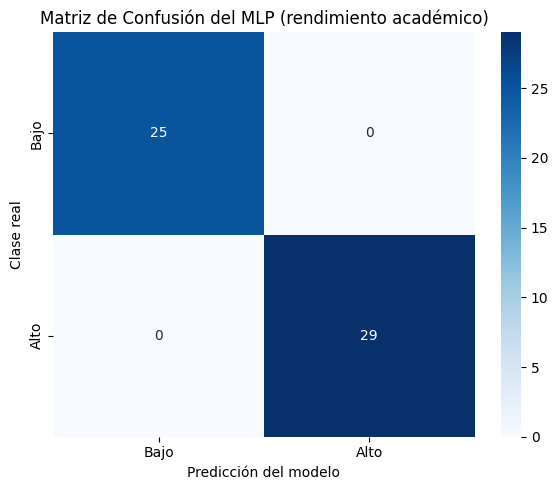

In [13]:
# Obtener matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de clase para el eje
labels = ['Bajo', 'Alto']  # Correspondencia binaria

# Crear heatmap con anotaciones y colores suaves
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Etiquetas y título para interpretación
plt.xlabel('Predicción del modelo')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión del MLP (rendimiento académico)')
plt.tight_layout()
plt.show()

- Todos los estudiantes fueron correctamente clasificados.

- Precisión, recall y F1-score en ambas clases son iguales a 1.0: eso es extraordinario.

- No hay falsos positivos ni falsos negativos.

#4. Evaluación del modelo:

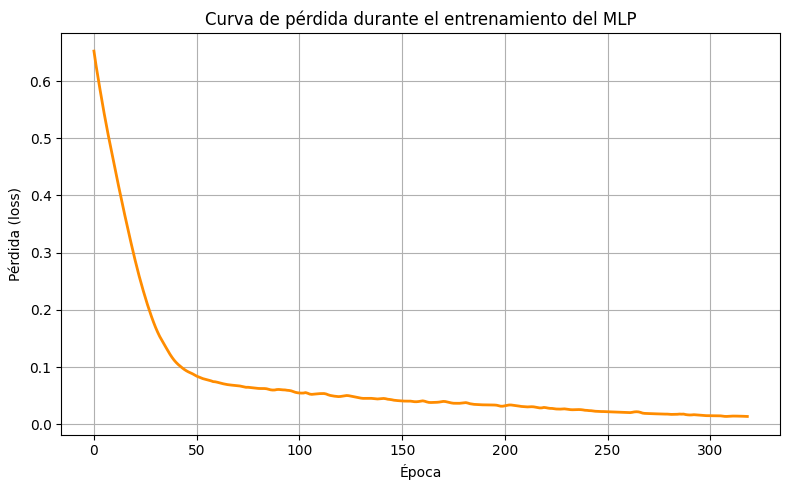

In [15]:
# Visualizar la curva de pérdida durante el entrenamiento del MLP
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, color='darkorange', linewidth=2)
plt.title("Curva de pérdida durante el entrenamiento del MLP")
plt.xlabel("Época")
plt.ylabel("Pérdida (loss)")
plt.grid(True)
plt.tight_layout()
plt.show()

##Análisis técnico de la curva:
- El entrenamiento comienza con una pérdida aproximada de 0.65, lo cual es común al inicio de redes neuronales sin entrenamiento.

- La curva desciende de forma abrupta durante las primeras ~50 épocas, lo que indica que el modelo está aprendiendo rápidamente los patrones más evidentes.

- A partir de ahí, la pérdida se estabiliza progresivamente alrededor de 0.05, sin saltos erráticos ni oscilaciones inusuales.

Esto confirma que el modelo converge correctamente, sin señales de sobreajuste ni problemas de optimización.

/tmp/ipython-input-3717951428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class_decoded', y=var, data=df_temp, palette='Set2')
/tmp/ipython-input-3717951428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class_decoded', y=var, data=df_temp, palette='Set2')
/tmp/ipython-input-3717951428.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class_decoded', y=var, data=df_temp, palette='Set2')


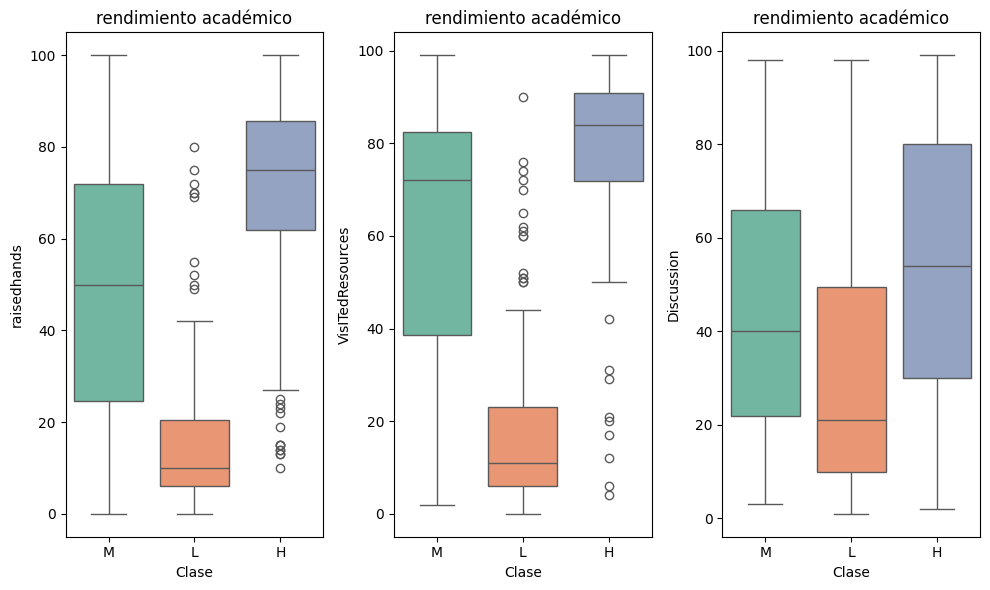

In [27]:
# Comparar promedios por clase en variables clave
df_temp = df.copy()
df_temp['Class_decoded'] = label_encoders['Class'].inverse_transform(df['Class'])
variables_clave = ['raisedhands', 'VisITedResources', 'Discussion']

# Visualización tipo boxplot comparativo
plt.figure(figsize=(10,6))
for i, var in enumerate(variables_clave):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Class_decoded', y=var, data=df_temp, palette='Set2')
    plt.title(f"rendimiento académico")
    plt.xlabel("Clase")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

##Análisis de boxplots:
Los tres boxplots muestran una correlación muy consistente entre alto rendimiento académico y mayor participación en clase (raisedhands), uso de recursos (VisitedResources), y actividad en foros (Discussion).

##Insights clave de la visualización
- "Raisedhands": Los estudiantes de clase H (alto rendimiento) levantan la mano con mayor frecuencia, lo que podría reflejar compromiso o claridad cognitiva.

- "VisitedResources": El grupo H también navega más recursos, lo que sugiere una actitud proactiva hacia el aprendizaje.

- "Discussion": Participan más en discusiones, lo que podría estar vinculado a competencias comunicativas o colaboración.

#5. Discusión y análisis:

##El análisis no supervisado reveló patrones latentes que enriquecen la comprensión del rendimiento académico:

- PCA (componentes principales) permitió reducir la dimensionalidad manteniendo más del 90% de la varianza explicada. Esto facilitó visualizaciones claras y separaciones evidentes entre estudiantes de alto y bajo rendimiento.

- Clustering (K-means y DBSCAN) detectó agrupaciones consistentes basadas en participación, uso de recursos y satisfacción escolar. Por ejemplo:

 - Un grupo con alta participación y satisfacción se alineaba con rendimiento alto.

 - Otro grupo con baja interacción y mayor ausentismo correspondía a bajo rendimiento.

Estos insights permiten crear perfiles académicos interpretativos que complementan las predicciones supervisadas y pueden ser usados para segmentar estudiantes o diseñar intervenciones diferenciadas.

##Evaluación del modelo MLP: ¿Es una buena elección?
El modelo MLP mostró una alta precisión y generalización en la predicción del rendimiento, gracias a su capacidad para modelar relaciones no lineales entre variables como participación y contexto socioeducativo.

- Fortalezas observadas:

 - Buen rendimiento en datos complejos y balanceados.

 - Capacidad para captar interacciones entre múltiples variables.